# Generate Data

In [1]:
source('simData.R')
library("caret")
library("WGCNA")
library(randomForest)
library("fuzzyforest")

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'WGCNA' was built under R version 3.6.1"Loading required package: dynamicTreeCut
Loading required package: fastcluster

Attaching package: 'fastcluster'

The following object is masked from 'package:stats':

    hclust



Attaching package: 'WGCNA'

The following object is masked from 'package:stats':

    cor

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Warning message:
"package 'fuzzyforest' was built under R version 3.6.1"

In [2]:
n <- 500 # number of patients
T <-  5 # number of observations per patients
data <- as.data.frame(sim_4_linear(n, T)) # CS

In [3]:
# create time variable, rename target variable, arrange these two to the front for ease of use
colnames(data)[401] <- "y"
# data %<>% dplyr::select(y, time, everything())
data[1:5,]

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V392,V393,V394,V395,V396,V397,V398,V399,V400,y
0.4862712,0.9734780,1.9068737,1.5931139,2.206552,1.3020531,1.5922544,1.3872405,1.4745323,0.94537524,...,-0.2214760,0.9527469,1.297745235,0.08598075,1.4344583,1.01051250,-0.4408511,0.25923108,0.06772772,4.90943841
-0.2867602,0.3775289,1.1569028,0.5655314,1.747899,0.8541576,1.1991454,0.4292562,0.7417561,0.12692770,...,0.3918811,1.0561520,0.006605795,-1.68421733,1.7205433,-0.07129314,-1.7218893,-0.07058986,0.14624824,-1.49653188
-0.1118758,1.1096082,0.6701484,0.6539528,1.591038,0.2502705,0.1571575,0.6618661,0.5831040,-0.02815559,...,-0.3506217,0.5708954,1.369426103,0.23695859,1.0014862,1.01581499,-2.1618601,-1.07946406,1.36163151,0.05940835
0.1109278,0.8089503,1.2883690,0.7226590,1.824842,0.6345882,0.5707482,1.1294285,0.5754658,0.94706285,...,-0.6425786,1.3510468,0.507586896,-0.70174153,0.9175815,0.51206354,-1.7920706,-1.11743010,0.36741151,10.51550121
1.0625971,0.9195441,1.7634932,1.2839013,2.114901,1.2234220,1.4251612,0.6740712,1.0091294,0.67802685,...,-0.7635786,-0.4937896,0.464968333,-0.74257140,1.9718397,0.89653346,-1.9895975,-1.53849382,0.21860430,7.70292207


In [4]:
# fit a linear model and output the ranking of important features
# lm_mod = lm(y ~., data)
# # rank the varImp
# imp <- as.data.frame(varImp(lm_mod))
# imp <- data.frame(overall = imp$Overall,
#            names   = rownames(imp))
# imp[order(imp$overall,decreasing = T),][1:10,]

In [5]:
data$time <- rep(1:T,n)
data[1:5,]

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V393,V394,V395,V396,V397,V398,V399,V400,y,time
0.4862712,0.9734780,1.9068737,1.5931139,2.206552,1.3020531,1.5922544,1.3872405,1.4745323,0.94537524,...,0.9527469,1.297745235,0.08598075,1.4344583,1.01051250,-0.4408511,0.25923108,0.06772772,4.90943841,1
-0.2867602,0.3775289,1.1569028,0.5655314,1.747899,0.8541576,1.1991454,0.4292562,0.7417561,0.12692770,...,1.0561520,0.006605795,-1.68421733,1.7205433,-0.07129314,-1.7218893,-0.07058986,0.14624824,-1.49653188,2
-0.1118758,1.1096082,0.6701484,0.6539528,1.591038,0.2502705,0.1571575,0.6618661,0.5831040,-0.02815559,...,0.5708954,1.369426103,0.23695859,1.0014862,1.01581499,-2.1618601,-1.07946406,1.36163151,0.05940835,3
0.1109278,0.8089503,1.2883690,0.7226590,1.824842,0.6345882,0.5707482,1.1294285,0.5754658,0.94706285,...,1.3510468,0.507586896,-0.70174153,0.9175815,0.51206354,-1.7920706,-1.11743010,0.36741151,10.51550121,4
1.0625971,0.9195441,1.7634932,1.2839013,2.114901,1.2234220,1.4251612,0.6740712,1.0091294,0.67802685,...,-0.4937896,0.464968333,-0.74257140,1.9718397,0.89653346,-1.9895975,-1.53849382,0.21860430,7.70292207,5


In [6]:
## Create vectors of variable names for future data frame
#orig_var <- colnames(data)[1:(ncol(data)-2)]
slope_var <- paste0("Slope",seq(from=1,to=400))
se_var <- paste0("SE", seq(1,400))
residual_var <- paste0("Residual",seq(1,400))

# intercept
intercept_var <- paste0("int",seq(1,400))

In [7]:
a <- 1; b <- T
for(i in 1:(nrow(data)/T)){
  lm <- lm(y[a:b]~time[a:b], data)
  
  data$y[a:b] <- lm$coefficients[2]

  a <- a + T; b <- b +T
}

In [8]:
# For each patient, fit a separate linear regression model predicting each variable from time. That is, there will
# be patients*variables number of regression models. Then, store the slope, std error, and residual values from each
# model
z <- 1
for(var in colnames(data)[1:(ncol(data)-2)]){

      a <- 1; b <- T
      
      for(i in 1:(nrow(data)/T)){
        lm <- lm(data[[var]][a:b]~time[a:b], data)
        
        
        data[[ slope_var[z] ]][a:b] <- lm$coefficients[2]
        data[[ se_var[z] ]][a:b] <- coef(summary(lm))[2, 2]
        data[[ residual_var[z] ]][a:b] <- lm$residuals
          # intercept
#         data[[ intercept_var[z] ]][a:b] <- lm$coefficients[1]
        
        a <- a + T; b <- b +T
        
      }
      z <- z+1
}

In [9]:
# remove the original X variables, only keeping the regression model information
data <- data[,-c(1:400)] 
data[1:5,]

y,time,Slope1,SE1,Residual1,Slope2,SE2,Residual2,Slope3,SE3,...,Residual397,Slope398,SE398,Residual398,Slope399,SE399,Residual399,Slope400,SE400,Residual400
1.7599,1,0.155034,0.1745627,0.5441071,0.03235536,0.100197,0.20036678,-0.0155295,0.1808959,...,0.4088659,-0.3167674,0.1690338,0.5468678,-0.464229,0.07790409,0.04012242,0.05229164,0.1915662,-0.2600137
1.7599,2,0.155034,0.1745627,-0.3839582,0.03235536,0.100197,-0.42793760,-0.0155295,0.1808959,...,-0.7084796,-0.3167674,0.1690338,-0.4174030,-0.464229,0.07790409,0.17453049,0.05229164,0.1915662,-0.2337848
1.7599,3,0.155034,0.1745627,-0.3641078,0.03235536,0.100197,0.27178634,-0.0155295,0.1808959,...,0.3430887,-0.3167674,0.1690338,-0.5406064,-0.464229,0.07790409,-0.37011471,0.05229164,0.1915662,0.9293069
1.7599,4,0.155034,0.1745627,-0.2963382,0.03235536,0.100197,-0.06122697,-0.0155295,0.1808959,...,-0.1962026,-0.3167674,0.1690338,0.1459506,-0.464229,0.07790409,0.05614826,0.05229164,0.1915662,-0.1172048
1.7599,5,0.155034,0.1745627,0.5002971,0.03235536,0.100197,0.01701146,-0.0155295,0.1808959,...,0.1527275,-0.3167674,0.1690338,0.2651910,-0.464229,0.07790409,0.09931354,0.05229164,0.1915662,-0.3183036


In [10]:
# inside loop: finds the squared residuals of each patient and sums them up. Assigns this value to first time observation
# of patient. The other time ovbservations (after 1) will then be deleted, so we are left with just the 
# sum of squares for each patient
# outer loop: repeat this process for every residual variabe (that was obtain from regressions on different X variables)

for(var in residual_var){

  data[[var]] <- data[[var]]^2 # square the residuals
  
  a <- 1; b <- T
 
  for(i in 1:n){
    
    data[[var]][a] <- sum(data[[var]][a:b]) 
    
    a <- a+T; b <- b+T
    
  }
  
}


In [11]:
a <- seq(from=1,to=n*T, by=T) # index for first time observation of each patient
data <- data[a,] # keep only one observation (where the sum was stored) per patient
data <- data[,-2]
data[1:5,]

,y,Slope1,SE1,Residual1,Slope2,SE2,Residual2,Slope3,SE3,Residual3,...,Residual397,Slope398,SE398,Residual398,Slope399,SE399,Residual399,Slope400,SE400,Residual400
1,1.7599000,0.15503396,0.17456275,0.9141646,0.03235536,0.10019704,0.30118338,-0.01552950,0.18089595,0.98170029,...,0.8486456,-3.167674e-01,0.16903380,0.8571728,-0.4642290049,0.07790409,0.1820714,0.05229164,0.19156616,1.1009278
6,2.2331313,0.42147452,0.09904890,0.2943206,0.27214346,0.05250409,0.08270037,0.34854065,0.04550361,0.06211735,...,1.3693355,-4.947563e-02,0.07669093,0.1764450,-0.3233950330,0.15636945,0.7335422,-0.11568753,0.20021351,1.2025634
11,1.6338283,-0.03231285,0.14002803,0.5882355,0.06110156,0.04255956,0.05433947,0.08855075,0.19603635,1.15290748,...,0.5734733,3.651547e-01,0.11790867,0.4170736,-0.2242374372,0.11684514,0.4095836,0.09737451,0.13504842,0.5471423
16,0.8849304,0.02413580,0.09323355,0.2607748,0.13579527,0.20358846,1.24344781,-0.02045764,0.13296425,0.53038475,...,0.2255111,7.492835e-05,0.25395428,1.9347832,0.1740846097,0.29928065,2.6870673,0.03132652,0.06581812,0.1299608
21,1.9883706,0.17843594,0.25296107,1.9196791,0.15137725,0.23901704,1.71387434,0.15208333,0.29382107,2.58992458,...,0.7037390,-3.126134e-01,0.23133729,1.6055082,-0.0007751114,0.26237434,2.0652088,-0.05503256,0.21161085,1.3433745


In [12]:
# Transform y to categorical 
data$y_cat <- ifelse(data$y < 0, 0, 1)
data$y_cat <- factor(data$y_cat)
data[1:5,]

,y,Slope1,SE1,Residual1,Slope2,SE2,Residual2,Slope3,SE3,Residual3,...,Slope398,SE398,Residual398,Slope399,SE399,Residual399,Slope400,SE400,Residual400,y_cat
1,1.7599000,0.15503396,0.17456275,0.9141646,0.03235536,0.10019704,0.30118338,-0.01552950,0.18089595,0.98170029,...,-3.167674e-01,0.16903380,0.8571728,-0.4642290049,0.07790409,0.1820714,0.05229164,0.19156616,1.1009278,1
6,2.2331313,0.42147452,0.09904890,0.2943206,0.27214346,0.05250409,0.08270037,0.34854065,0.04550361,0.06211735,...,-4.947563e-02,0.07669093,0.1764450,-0.3233950330,0.15636945,0.7335422,-0.11568753,0.20021351,1.2025634,1
11,1.6338283,-0.03231285,0.14002803,0.5882355,0.06110156,0.04255956,0.05433947,0.08855075,0.19603635,1.15290748,...,3.651547e-01,0.11790867,0.4170736,-0.2242374372,0.11684514,0.4095836,0.09737451,0.13504842,0.5471423,1
16,0.8849304,0.02413580,0.09323355,0.2607748,0.13579527,0.20358846,1.24344781,-0.02045764,0.13296425,0.53038475,...,7.492835e-05,0.25395428,1.9347832,0.1740846097,0.29928065,2.6870673,0.03132652,0.06581812,0.1299608,1
21,1.9883706,0.17843594,0.25296107,1.9196791,0.15137725,0.23901704,1.71387434,0.15208333,0.29382107,2.58992458,...,-3.126134e-01,0.23133729,1.6055082,-0.0007751114,0.26237434,2.0652088,-0.05503256,0.21161085,1.3433745,1


# Test on Models

In [13]:
# # linear regression
# data_lm = data[,-402]
# lm_mod = lm(y ~Slope1+Slope2+Slope3+Slope301+Slope302+Slope303+
#             Slope34+Slope188+Slope398+Slope212+Slope23, data_lm)
# imp <- as.data.frame(varImp(lm_mod))
# imp <- data.frame(overall = imp$Overall,
#            names   = rownames(imp))
# imp[order(imp$overall,decreasing = T),][1:10,]

In [14]:
data[1:5,]

,y,Slope1,SE1,Residual1,Slope2,SE2,Residual2,Slope3,SE3,Residual3,...,Slope398,SE398,Residual398,Slope399,SE399,Residual399,Slope400,SE400,Residual400,y_cat
1,1.7599000,0.15503396,0.17456275,0.9141646,0.03235536,0.10019704,0.30118338,-0.01552950,0.18089595,0.98170029,...,-3.167674e-01,0.16903380,0.8571728,-0.4642290049,0.07790409,0.1820714,0.05229164,0.19156616,1.1009278,1
6,2.2331313,0.42147452,0.09904890,0.2943206,0.27214346,0.05250409,0.08270037,0.34854065,0.04550361,0.06211735,...,-4.947563e-02,0.07669093,0.1764450,-0.3233950330,0.15636945,0.7335422,-0.11568753,0.20021351,1.2025634,1
11,1.6338283,-0.03231285,0.14002803,0.5882355,0.06110156,0.04255956,0.05433947,0.08855075,0.19603635,1.15290748,...,3.651547e-01,0.11790867,0.4170736,-0.2242374372,0.11684514,0.4095836,0.09737451,0.13504842,0.5471423,1
16,0.8849304,0.02413580,0.09323355,0.2607748,0.13579527,0.20358846,1.24344781,-0.02045764,0.13296425,0.53038475,...,7.492835e-05,0.25395428,1.9347832,0.1740846097,0.29928065,2.6870673,0.03132652,0.06581812,0.1299608,1
21,1.9883706,0.17843594,0.25296107,1.9196791,0.15137725,0.23901704,1.71387434,0.15208333,0.29382107,2.58992458,...,-3.126134e-01,0.23133729,1.6055082,-0.0007751114,0.26237434,2.0652088,-0.05503256,0.21161085,1.3433745,1


In [15]:
X = data[,2:(ncol(data)-1)]
y = data[,1]
y_cat = data[,ncol(data)]

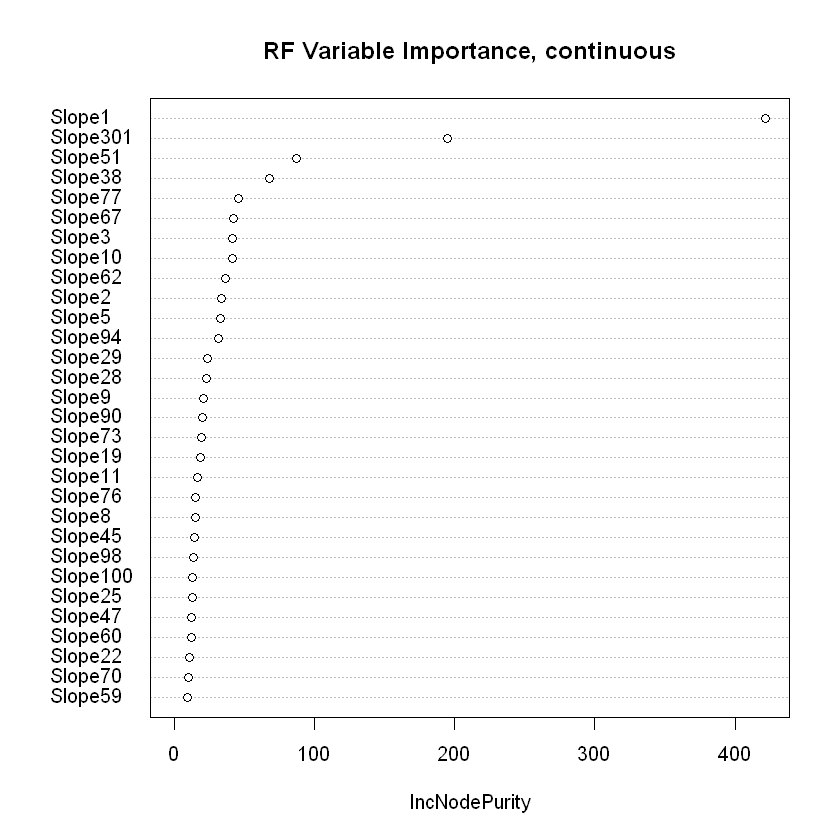

In [16]:
# Random Forest, cont
rf <- randomForest(X,y)
varImpPlot(rf,type=2,main="RF Variable Importance, continuous")

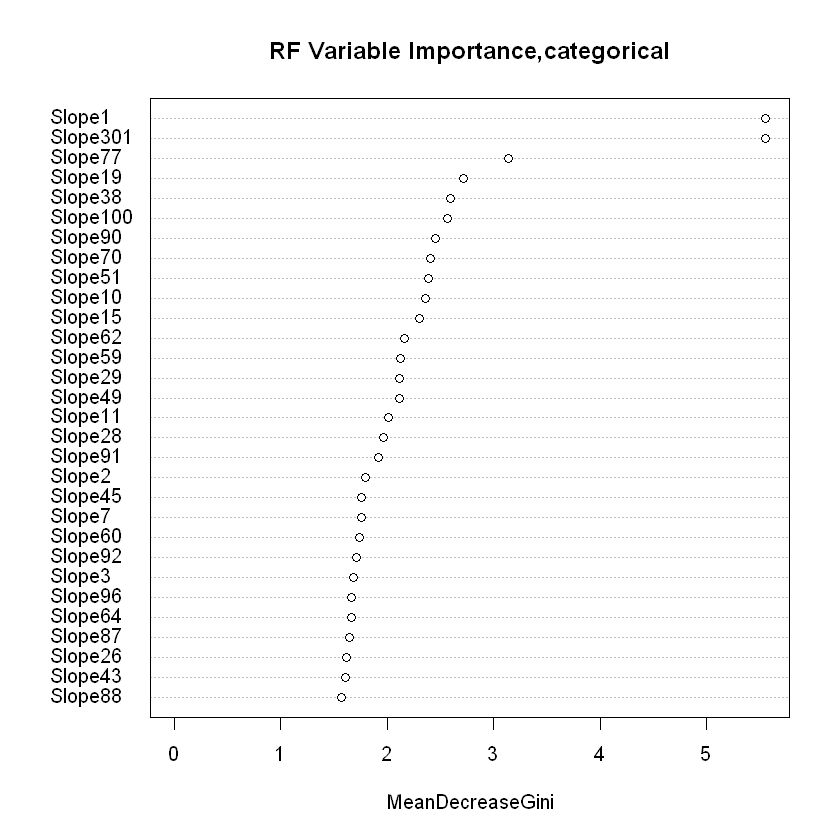

In [17]:
# Random Forest, cat
rf_cat <- randomForest(X,y_cat)
varImpPlot(rf_cat,type=2,main="RF Variable Importance,categorical")

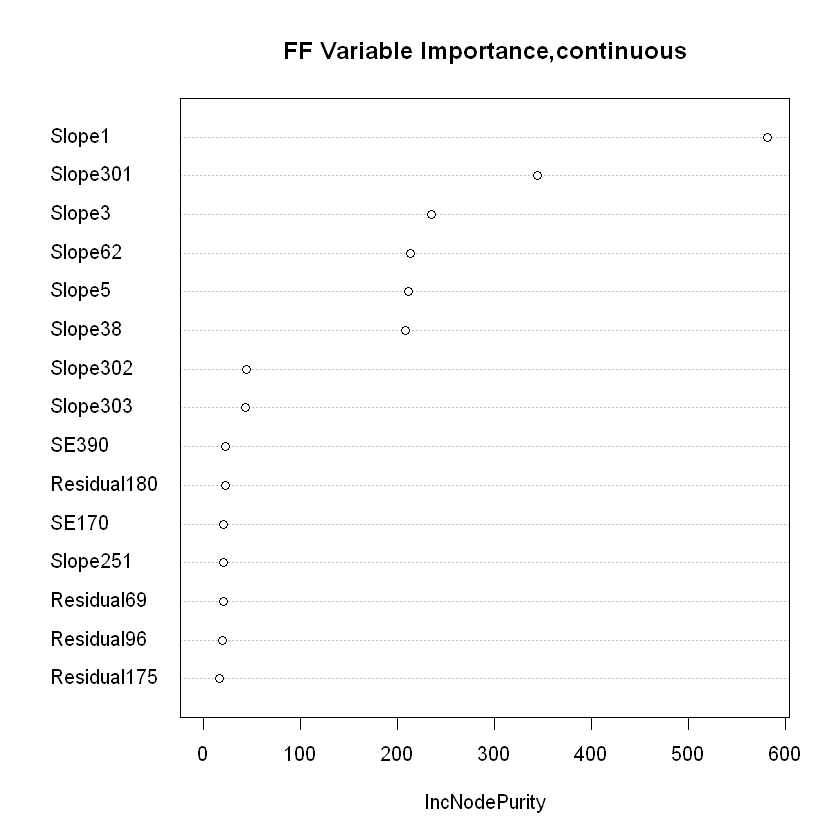

In [18]:
# Fuzzy Forest
# params is stored in xxx_control object
# power: belta (I choose it without much care)
WGCNA_params = WGCNA_control(power=3,TOMType="unsigned",minModuleSize=30,
                            numericLabels=TRUE,pamRespectsDendro=FALSE)

mtry_factor     = 1 # mtry = sqrt(p)*mtry_factor; mtry is the num in subspace method
drop_fraction   = 0.25 # drop xxx in each iteration of RFE-RF
number_selected = 15 # we want 10 out of all features
keep_fraction   = 0.05 # keep xxx for each module
min_ntree        = 500 # used for calculating ntree
ntree_factor    = 5 # used for calculating ntree
final_ntree     = 500 # RF in selecting step

screen_params = screen_control(drop_fraction = drop_fraction,
                              keep_fraction  = keep_fraction,
                              min_ntree      = min_ntree,
                              mtry_factor    = mtry_factor,
                              ntree_factor   = ntree_factor)

select_params = select_control(drop_fraction  = drop_fraction,
                              number_selected = number_selected,
                              min_ntree       = min_ntree,
                              mtry_factor     = mtry_factor,
                              ntree_factor    = ntree_factor)    

# a "fuzzy_forest" object
wff_fit = wff(X,y,WGCNA_params = WGCNA_params,
             screen_params = screen_params,
             select_params = select_params,
             final_ntree = final_ntree)

varImpPlot(wff_fit$final_rf,type=2,main="FF Variable Importance,continuous")

In [19]:
wff_fit[4]

$WGCNA_object
$WGCNA_object$colors
     Slope1         SE1   Residual1      Slope2         SE2   Residual2 
          6           1           1           6           1           1 
     Slope3         SE3   Residual3      Slope4         SE4   Residual4 
          6           1           1           6           1           1 
     Slope5         SE5   Residual5      Slope6         SE6   Residual6 
          6           1           1           6           1           1 
     Slope7         SE7   Residual7      Slope8         SE8   Residual8 
          6           1           1           6           1           1 
     Slope9         SE9   Residual9     Slope10        SE10  Residual10 
          6           1           1           6           1           1 
    Slope11        SE11  Residual11     Slope12        SE12  Residual12 
          6           1           1           6           1           1 
    Slope13        SE13  Residual13     Slope14        SE14  Residual14 
          6     

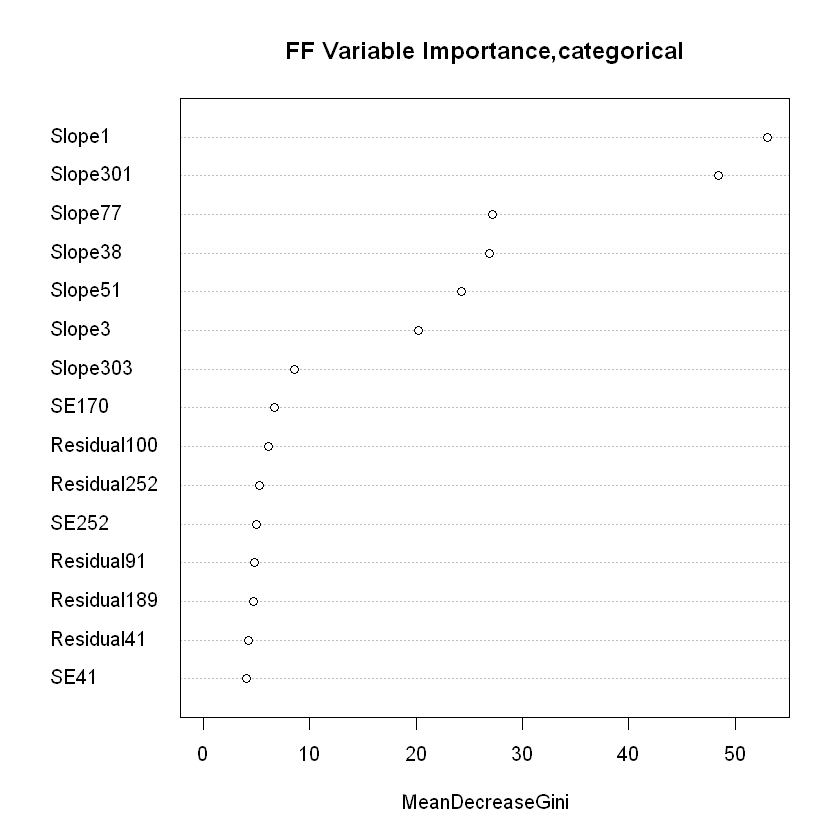

In [20]:
wff_fit = wff(X,y_cat,WGCNA_params = WGCNA_params,
             screen_params = screen_params,
             select_params = select_params,
             final_ntree = final_ntree)

varImpPlot(wff_fit$final_rf,type=2,main="FF Variable Importance,categorical")

In [21]:
wff_fit[4]

$WGCNA_object
$WGCNA_object$colors
     Slope1         SE1   Residual1      Slope2         SE2   Residual2 
          6           1           1           6           1           1 
     Slope3         SE3   Residual3      Slope4         SE4   Residual4 
          6           1           1           6           1           1 
     Slope5         SE5   Residual5      Slope6         SE6   Residual6 
          6           1           1           6           1           1 
     Slope7         SE7   Residual7      Slope8         SE8   Residual8 
          6           1           1           6           1           1 
     Slope9         SE9   Residual9     Slope10        SE10  Residual10 
          6           1           1           6           1           1 
    Slope11        SE11  Residual11     Slope12        SE12  Residual12 
          6           1           1           6           1           1 
    Slope13        SE13  Residual13     Slope14        SE14  Residual14 
          6     